# S - Algorithm

In [ ]:
import pandas as pd

data = pd.DataFrame({
    'Sky': ['Sunny', 'Sunny', 'Rainy', 'Sunny', 'Rainy', 'Rainy', 'Sunny'],
    'AirTemp': ['Warm', 'Warm', 'Cold', 'Warm', 'Cold', 'Cold', 'Warm'],
    'Humidity': ['Normal', 'High', 'High', 'High', 'Normal', 'Normal', 'High'],
    'Wind': ['Strong', 'Strong', 'Strong', 'Strong', 'Weak', 'Weak', 'Strong'],
    'Water': ['Warm', 'Warm', 'Cold', 'Warm', 'Warm', 'Cold', 'Warm'],
    'Forecast': ['Same', 'Same', 'Change', 'Same', 'Same', 'Change', 'Same'],
    'EnjoySport': ['Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes']
})

print("Sample Dataset:\n", data)

colLen = data.shape[1] - 1
h = ['0'] * colLen
hp = []
hn = []

for training in data.values:
    if training[-1] == 'Yes':
        hp.append(list(training))
        for i in range(colLen):
            if h[i] == '0':
                h[i] = training[i]
            elif h[i] != training[i]:
                h[i] = '?'
    else:
        hn.append(list(training))

print("\nPositive Hypotheses (Positive Training Examples):")
print(pd.DataFrame(hp, columns=list(data.columns)))

print("\nNegative Hypotheses (Negative Training Examples):")
print(pd.DataFrame(hn, columns=list(data.columns)))

print("\nMaximally Specific Hypothesis:")
print(h)


Sample Dataset:
      Sky AirTemp Humidity    Wind Water Forecast EnjoySport
0  Sunny    Warm   Normal  Strong  Warm     Same        Yes
1  Sunny    Warm     High  Strong  Warm     Same        Yes
2  Rainy    Cold     High  Strong  Cold   Change         No
3  Sunny    Warm     High  Strong  Warm     Same        Yes
4  Rainy    Cold   Normal    Weak  Warm     Same         No
5  Rainy    Cold   Normal    Weak  Cold   Change         No
6  Sunny    Warm     High  Strong  Warm     Same        Yes

Positive Hypotheses (Positive Training Examples):
     Sky AirTemp Humidity    Wind Water Forecast EnjoySport
0  Sunny    Warm   Normal  Strong  Warm     Same        Yes
1  Sunny    Warm     High  Strong  Warm     Same        Yes
2  Sunny    Warm     High  Strong  Warm     Same        Yes
3  Sunny    Warm     High  Strong  Warm     Same        Yes

Negative Hypotheses (Negative Training Examples):
     Sky AirTemp Humidity    Wind Water Forecast EnjoySport
0  Rainy    Cold     High  Strong  Cold  

# Linear Regression

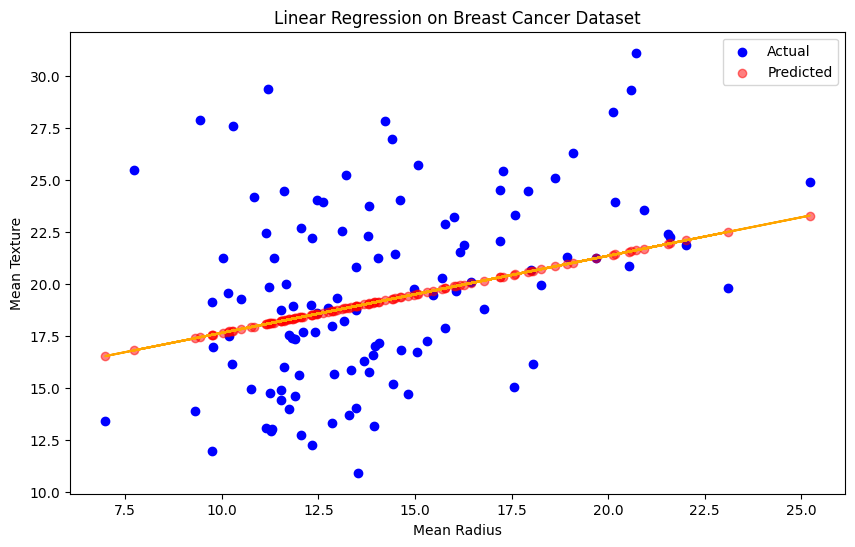

Mean Squared Error: 16.946319739410345


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

cancer = pd.read_csv('/content/breast_cancer.csv')
# cancer_df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)

X = cancer[['radius_mean']]
y = cancer['texture_mean']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted', alpha=0.5)
plt.plot(X_test, y_pred, color='orange')
plt.title('Linear Regression on Breast Cancer Dataset')
plt.xlabel('Mean Radius')
plt.ylabel('Mean Texture')
plt.legend()
plt.show()

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

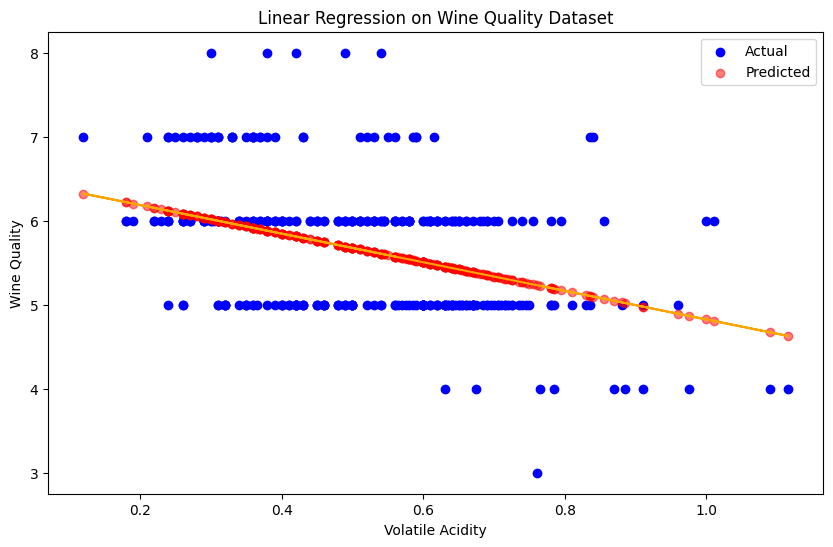

Mean Squared Error: 0.5327573121186268


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the Wine Quality dataset
wine = pd.read_csv('/content/winequality-red.csv')  

X = wine[['volatile acidity']]  
y = wine['quality']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted', alpha=0.5)
plt.plot(X_test, y_pred, color='orange')
plt.title('Linear Regression on Wine Quality Dataset')
plt.xlabel('Volatile Acidity')
plt.ylabel('Wine Quality')
plt.legend()
plt.show()

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))


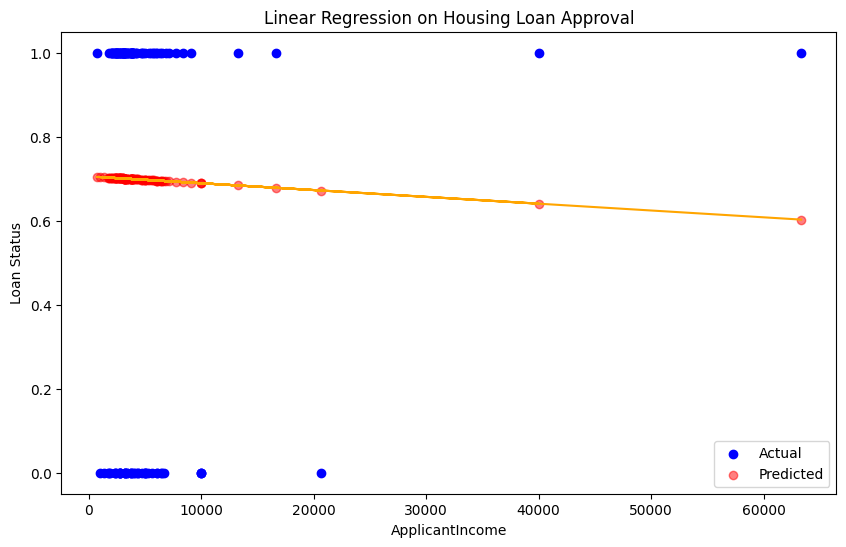

Mean Squared Error: 0.23016368529685888


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

loan = pd.read_csv('/content/loan_sanction_train.csv')  

loan['Loan_Status'] = loan['Loan_Status'].map({'Y': 1, 'N': 0})

X = loan[['ApplicantIncome']]  
y = loan['Loan_Status']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted', alpha=0.5)
plt.plot(X_test, y_pred, color='orange')
plt.title('Linear Regression on Housing Loan Approval')
plt.xlabel('ApplicantIncome')
plt.ylabel('Loan Status')
plt.legend()
plt.show()

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))


# Decision Tree using Gini

              precision    recall  f1-score   support

           N       0.38      0.30      0.34        43
           Y       0.66      0.74      0.70        80

    accuracy                           0.59       123
   macro avg       0.52      0.52      0.52       123
weighted avg       0.56      0.59      0.57       123



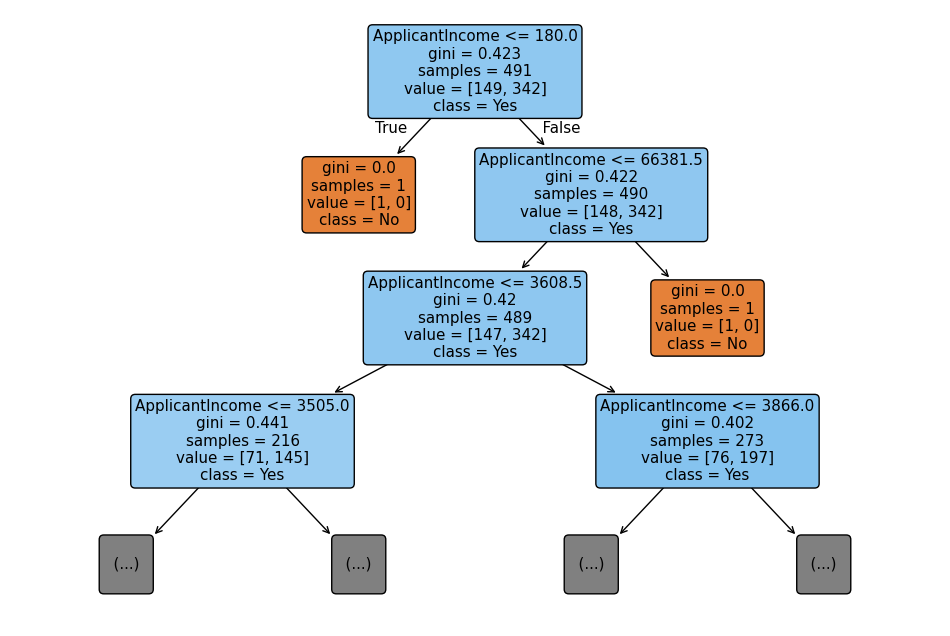

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

loan = pd.read_csv('/content/loan_sanction_train.csv')

X = loan[['ApplicantIncome']]
y = loan['Loan_Status']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

model = DecisionTreeClassifier(criterion='gini', random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

from sklearn.tree import plot_tree

plt.figure(figsize=(12, 8))
plot_tree(model, filled=True, feature_names=['ApplicantIncome'], class_names=['No', 'Yes'], rounded=True,max_depth=3)
plt.show()

              precision    recall  f1-score   support

         Bad       0.55      0.59      0.57       141
        Good       0.66      0.63      0.64       179

    accuracy                           0.61       320
   macro avg       0.61      0.61      0.61       320
weighted avg       0.61      0.61      0.61       320



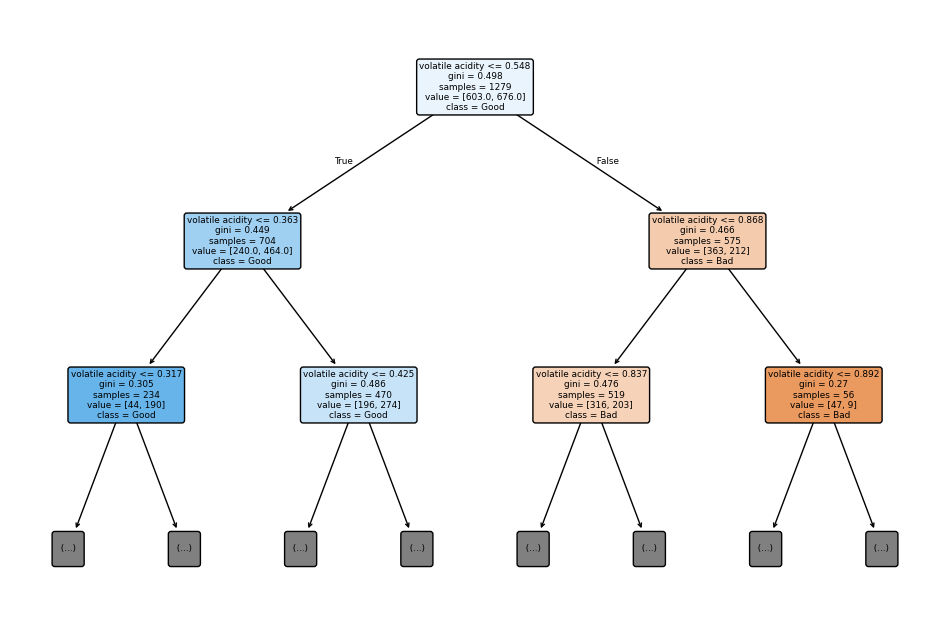

In [ ]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

loan = pd.read_csv('/content/winequality-red.csv')

X = loan[['volatile acidity']]
y = loan['quality']
y = y.apply(lambda x: 'Good' if x >= 6 else 'Bad')

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

model = DecisionTreeClassifier(criterion='gini', random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

from sklearn.tree import plot_tree

plt.figure(figsize=(12, 8))
plot_tree(model, filled=True, feature_names=['volatile acidity'], class_names=['Bad', 'Good'], rounded=True,max_depth=2)
plt.show()

# Ensemble Methods

Random Forest Classification Report:
              precision    recall  f1-score   support

           N       0.26      0.14      0.18        43
           Y       0.63      0.79      0.70        80

    accuracy                           0.56       123
   macro avg       0.45      0.46      0.44       123
weighted avg       0.50      0.56      0.52       123

Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           N       0.38      0.07      0.12        43
           Y       0.65      0.94      0.77        80

    accuracy                           0.63       123
   macro avg       0.51      0.50      0.44       123
weighted avg       0.56      0.63      0.54       123



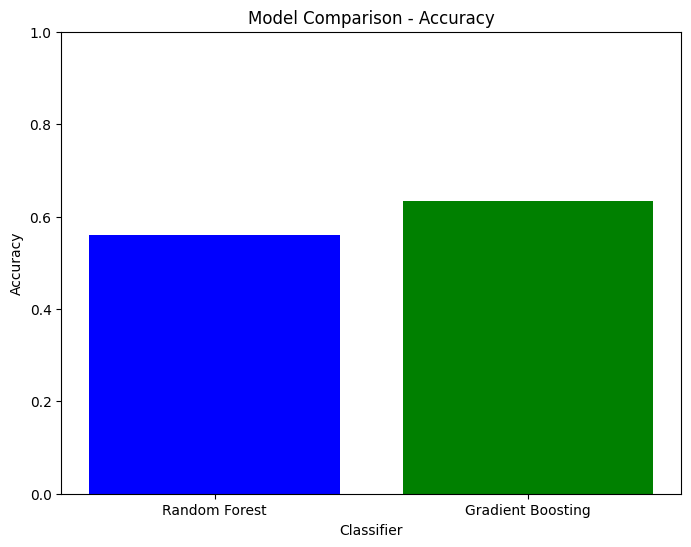

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

loan = pd.read_csv('/content/loan_sanction_train.csv')

X = loan[['ApplicantIncome']]
y = loan['Loan_Status']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)

print("Random Forest Classification Report:")
print(classification_report(y_test, rf_pred))
print("Gradient Boosting Classification Report:")
print(classification_report(y_test, gb_pred))

rf_accuracy = accuracy_score(y_test, rf_pred)

gb_accuracy = accuracy_score(y_test, gb_pred)

plt.figure(figsize=(8, 6))
plt.bar(['Random Forest', 'Gradient Boosting'], [rf_accuracy, gb_accuracy], color=['blue', 'green'])
plt.title('Model Comparison - Accuracy')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()


# Bayesian Classification

              precision    recall  f1-score   support

           B       0.90      1.00      0.95        71
           M       1.00      0.81      0.90        43

    accuracy                           0.93       114
   macro avg       0.95      0.91      0.92       114
weighted avg       0.94      0.93      0.93       114

[[71  0]
 [ 8 35]]


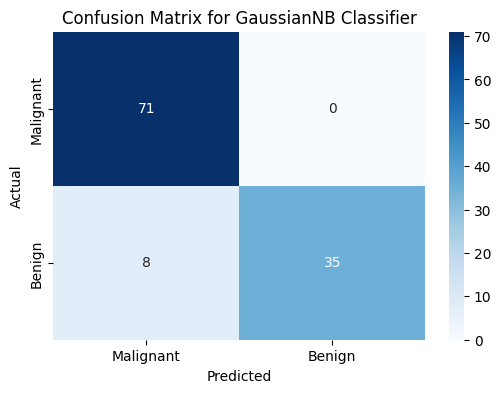

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix

cancer = pd.read_csv('/content/breast_cancer.csv')

X = cancer[['radius_mean']]
y = cancer['diagnosis']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb_pred = gnb.predict(X_test)

print(classification_report(y_test, gnb_pred))

cm = confusion_matrix(y_test, gnb_pred)
print(cm)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['Malignant', 'Benign'], yticklabels=['Malignant', 'Benign'])
plt.title('Confusion Matrix for GaussianNB Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# Compare classification models

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:598: UserWarning: Skipping features without any observed values: ['Unnamed: 32']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


Decision Tree Accuracy: 0.94
Random Forest Accuracy: 0.96
Gradient Boosting Accuracy: 0.95
Naive Bayes Accuracy: 0.96
SVM Accuracy: 0.96
Logistic Regression Accuracy: 0.97
K-Nearest Neighbors Accuracy: 0.95


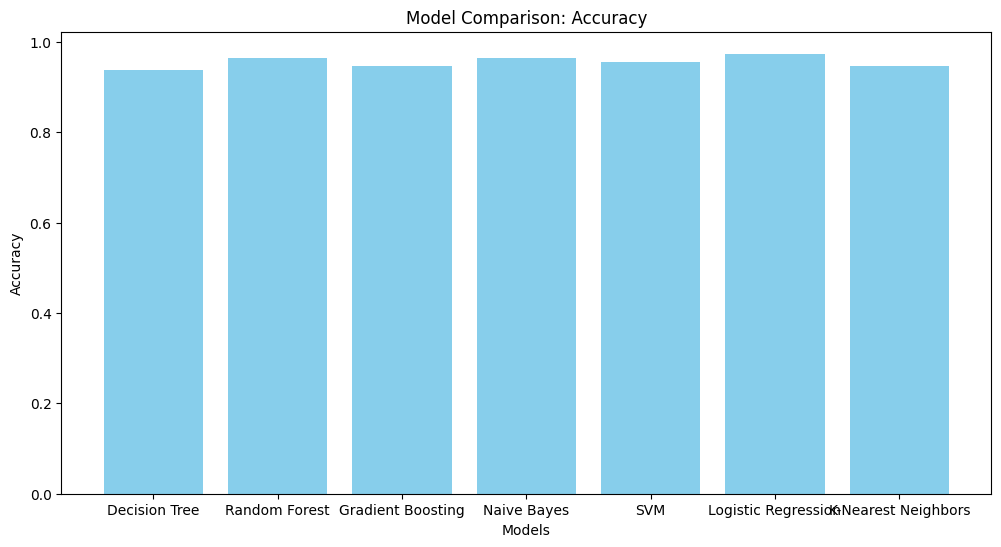

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

df = pd.read_csv('/content/breast_cancer.csv')

X = df.drop('diagnosis', axis=1)  
y = df['diagnosis']  

X_imputed = SimpleImputer(strategy='median').fit_transform(X)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)
gb = GradientBoostingClassifier(random_state=42)
gnb = GaussianNB()
svm = LinearSVC(random_state=42) 
log_reg = LogisticRegression(random_state=42)
knn = KNeighborsClassifier()

dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
gb.fit(X_train, y_train)
gnb.fit(X_train, y_train)
svm.fit(X_train, y_train)
log_reg.fit(X_train, y_train)
knn.fit(X_train, y_train)

models = {
    'Decision Tree': dt,
    'Random Forest': rf,
    'Gradient Boosting': gb,
    'Naive Bayes': gnb,
    'SVM': svm,
    'Logistic Regression': log_reg,
    'K-Nearest Neighbors': knn
}
accuracies = {}

for name, model in models.items():
    accuracy = model.score(X_test, y_test)
    accuracies[name] = accuracy
    print(f"{name} Accuracy: {accuracy:.2f}")

plt.figure(figsize=(12, 6))
plt.bar(accuracies.keys(), accuracies.values(), color='skyblue')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Comparison: Accuracy')
plt.show()


# SVM

SVM (RBF Kernel) Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        17
           5       0.64      0.78      0.71       195
           6       0.57      0.60      0.59       200
           7       0.59      0.28      0.38        61
           8       0.00      0.00      0.00         6

    accuracy                           0.61       480
   macro avg       0.30      0.28      0.28       480
weighted avg       0.57      0.61      0.58       480



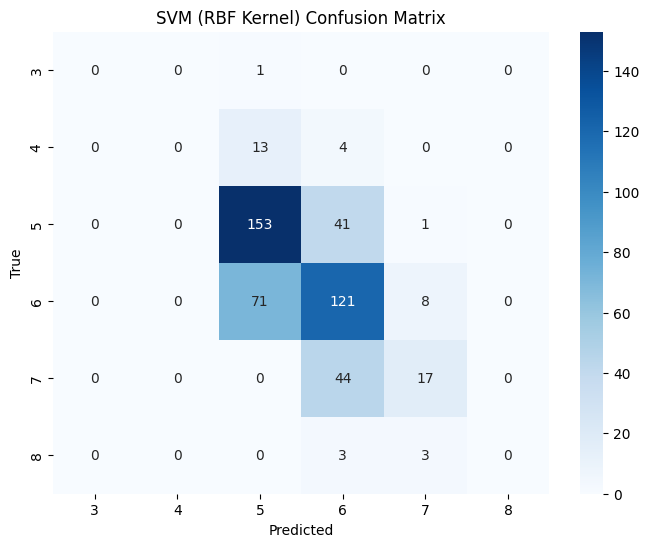

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('/content/winequality-red.csv')

X = data.drop('quality', axis=1)
y = data['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_rbf = SVC(kernel='rbf', random_state=42)
svm_rbf.fit(X_train_scaled, y_train)
svm_rbf_pred = svm_rbf.predict(X_test_scaled)  

print("SVM (RBF Kernel) Classification Report:")
print(classification_report(y_test, svm_rbf_pred, zero_division=0))

conf_matrix = confusion_matrix(y_test, svm_rbf_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('SVM (RBF Kernel) Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


# KMeans and KMedoids

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs, load_iris, load_breast_cancer
from sklearn_extra.cluster import KMedoids

iris = load_iris()
x = iris.data
y = iris.target

kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(x)
y_kmeans = kmeans.predict(x)
centroid = kmeans.cluster_centers_
labels = kmeans.labels_

kmedoids = KMedoids(n_clusters=3)
kmedoids.fit(x)
y_kmedoids = kmedoids.predict(x)
medoid = kmedoids.cluster_centers_
labels = kmedoids.labels_

plt.scatter(x[:, 0], x[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centroid[:, 0], centroid[:, 1], c='red', marker="X", s=200)
plt.title('KMeans Clustering of Iris Dataset')
plt.show()

plt.scatter(x[:, 0], x[:, 1], c=labels, s=50, cmap='winter')
plt.scatter(medoid[:, 0], medoid[:, 1], c='red', marker="X", s=200)
plt.title('K-Medoids Clustering of Iris Dataset')
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

data = load_wine()
X, y = data.data, data.target

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

y_pred = kmeans.labels_
silhouette = silhouette_score(X, y_pred)

print("Wine Dataset - K-Means Clustering Results:")
print(f"Silhouette Score: {silhouette:.3f}")

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis', alpha=0.7)
plt.title("K-Means Clustering on Wine Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()